In [1]:
fedFunds = read.csv("federalFundsRate.csv", stringsAsFactors = FALSE)

In [2]:
str(fedFunds)

'data.frame':	585 obs. of  12 variables:
 $ Date               : chr  "1966-02-01" "1966-03-01" "1966-04-01" "1966-05-01" ...
 $ Chairman           : chr  "Martin, William M." "Martin, William M." "Martin, William M." "Martin, William M." ...
 $ PreviousRate       : num  4.42 4.6 4.65 4.67 4.9 5.17 5.3 5.53 5.4 5.53 ...
 $ Streak             : int  4 5 6 7 8 9 10 11 -1 1 ...
 $ GDP                : num  4202 4202 4202 4219 4219 ...
 $ Unemployment       : num  4 3.8 3.8 3.8 3.9 3.8 3.8 3.8 3.7 3.7 ...
 $ CPI                : num  31.9 32.1 32.2 32.3 32.4 ...
 $ HomeownershipRate  : num  63.5 63.5 63.5 63.2 63.2 63.2 63.3 63.3 63.3 63.8 ...
 $ DebtAsPctGDP       : num  40.3 4201.9 4201.9 39.2 4219.1 ...
 $ DemocraticPres     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ MonthsUntilElection: int  33 32 31 30 29 28 27 26 25 24 ...
 $ RaisedFedFunds     : int  1 1 1 1 1 1 1 0 1 1 ...


In [3]:
table(fedFunds$RaisedFedFunds)


  0   1 
291 294 

In [4]:
294/(294+291)

[1] 0.5025641

In [5]:
table(fedFunds$Chairman, fedFunds$RaisedFedFunds)

                    
                       0   1
  Bernanke, Ben       64  32
  Burns, Arthur       46  50
  Greenspan, Alan    111 110
  Martin, William M.  16  32
  Miller, G. William   2  15
  N/A                  0   2
  Volcker, Paul       46  50
  Yellen, Janet        6   3

In [6]:
table(fedFunds$Chairman)


     Bernanke, Ben      Burns, Arthur    Greenspan, Alan Martin, William M. 
                96                 96                221                 48 
Miller, G. William                N/A      Volcker, Paul      Yellen, Janet 
                17                  2                 96                  9 

In [7]:
fedFunds$Chairman= as.factor(fedFunds$Chairman)
fedFunds$DemocraticPres = as.factor(fedFunds$DemocraticPres)
fedFunds$RaisedFedFunds = as.factor(fedFunds$RaisedFedFunds)

In [8]:
set.seed(201)
library(caTools)


In [9]:
spl = sample.split(fedFunds$RaisedFedFunds, SplitRatio = 0.70)

In [10]:
training = subset(fedFunds, spl == TRUE)
testing = subset(fedFunds, spl == FALSE)

In [11]:
LogRegModel1 = glm(RaisedFedFunds~PreviousRate+Streak+Unemployment
                   +HomeownershipRate+DemocraticPres+MonthsUntilElection, data=training, family = binomial)

In [12]:
summary(LogRegModel1)


Call:
glm(formula = RaisedFedFunds ~ PreviousRate + Streak + Unemployment + 
    HomeownershipRate + DemocraticPres + MonthsUntilElection, 
    family = binomial, data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8177  -1.0121   0.2301   1.0491   2.5297  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          9.121012   5.155774   1.769   0.0769 .  
PreviousRate        -0.003427   0.032350  -0.106   0.9156    
Streak               0.157658   0.025147   6.270 3.62e-10 ***
Unemployment        -0.047449   0.065438  -0.725   0.4684    
HomeownershipRate   -0.136451   0.076872  -1.775   0.0759 .  
DemocraticPres1      0.347829   0.233200   1.492   0.1358    
MonthsUntilElection -0.006931   0.007678  -0.903   0.3666    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 568.37  on 409  degrees of freedom
Residual devia

In [13]:
cor(fedFunds$Streak,as.numeric(fedFunds$RaisedFedFunds))

[1] 0.3629207

In [14]:
v=9.121012+(-0.003427*1.7)+(0.157658*-3)+(-0.047449*5.1)+(-0.136451*65.3)+(0.347829*0)+(-0.006931*18)

In [38]:
fedFunds$DemocraticPres[1:10]

[1] 1 1 1 1 1 1 1 1 1 1
Levels: 0 1

In [35]:
nrow(testing)

[1] 175

In [47]:
t = data.frame(Streak=-3,PreviousRate=1.7,Unemployment=5.1,HomeownershipRate=65.3,DemocraticPres=factor(0),MonthsUntilElection=18)

In [48]:
t

,Streak,PreviousRate,Unemployment,HomeownershipRate,DemocraticPres,MonthsUntilElection
1,-3,1.7,5.1,65.3,0,18


In [49]:
tres = predict(LogRegModel1,newdata = t,type = "response")

In [50]:
tres

1 
0.3464297

In [15]:
p1=1/(1+exp(-v))
p1

[1] 0.3464261

In [19]:
v2= 9.121012+(-0.003427*1.7)+(0.157658*-3)+(-0.047449*5.1)+(-0.136451*65.3)+(0.347829*1)+(-0.006931*18)

In [20]:
p2=1/(1+exp(-v2))
p2

[1] 0.428749

In [21]:
p2/p1

[1] 1.237635

In [22]:
t=table(fedFunds$RaisedFedFunds)

In [23]:
t


  0   1 
291 294 

In [26]:
294/(294+291)

[1] 0.5025641

In [27]:
predRes = predict(LogRegModel1, newdata = testing, type = "response")

In [28]:
t = table(testing$RaisedFedFunds,predRes>0.5)

In [29]:
t

   
    FALSE TRUE
  0    60   27
  1    31   57

In [40]:
sum(predRes<0.5)

[1] 91

In [44]:
predResBin = as.numeric(predRes>=0.5)
sum(predResBin)

[1] 84

In [49]:
length(predResBin)

[1] 175

In [46]:
library(ROCR)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [54]:
ROCRpredTest = prediction(predRes, testing$RaisedFedFunds)

In [55]:
auc = as.numeric(performance(ROCRpredTest,"auc")@y.values)

In [56]:
auc

[1] 0.704023

In [60]:
ROCRPerf = performance(ROCRpredTest,"tpr","fpr")

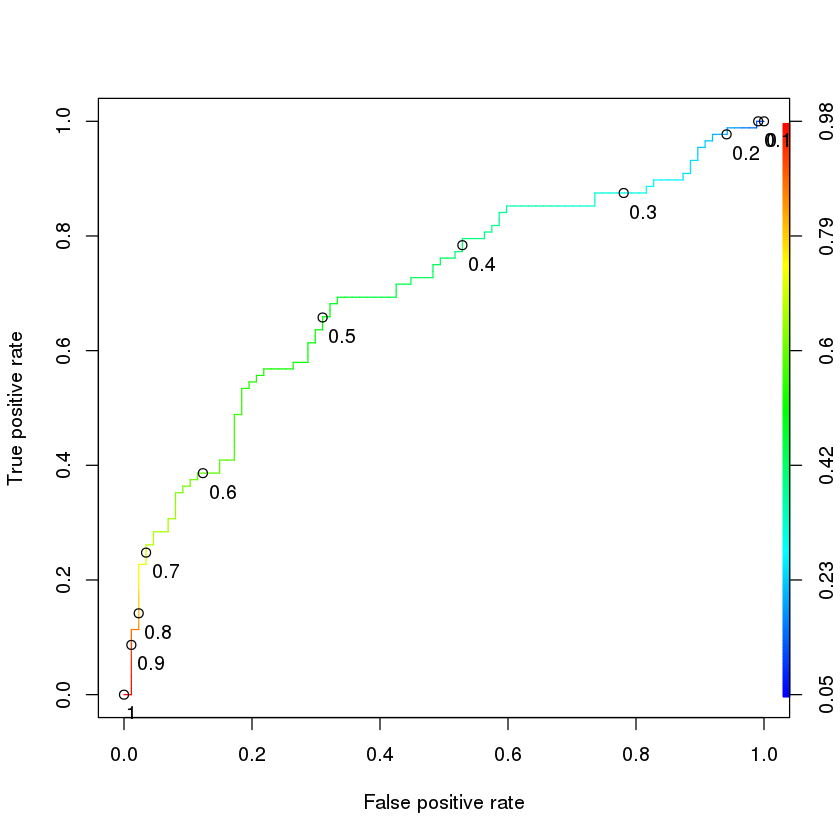

In [62]:

plot(ROCRPerf, colorize = TRUE,print.cutoffs.at = seq(0,1,0.1), text.adj=c(-0.2,1.7))

In [69]:
set.seed(201)
library(caret)

In [70]:
numFolds = trainControl(method = "cv",number = 10)

In [71]:
cpGrid = expand.grid(.cp=seq(0.001,0.05,0.001))

In [72]:
dim(cpGrid)

[1] 50  1

In [73]:
train(RaisedFedFunds~PreviousRate+Streak+Unemployment
                   +HomeownershipRate+DemocraticPres+MonthsUntilElection,data = training, method = "rpart", trControl = numFolds, 
      tuneGrid = cpGrid)

CART 

410 samples
 11 predictors
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 368, 368, 368, 370, 369, 369, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa      Accuracy SD  Kappa SD 
  0.001  0.6221312  0.2448321  0.07032469   0.1404483
  0.002  0.6221312  0.2448321  0.07032469   0.1404483
  0.003  0.6365331  0.2734338  0.07269107   0.1452330
  0.004  0.6340331  0.2684338  0.07989234   0.1596618
  0.005  0.6340331  0.2684338  0.07989234   0.1596618
  0.006  0.6487921  0.2980610  0.07527713   0.1506483
  0.007  0.6487921  0.2980610  0.07527713   0.1506483
  0.008  0.6487921  0.2980610  0.07527713   0.1506483
  0.009  0.6537311  0.3080170  0.07647219   0.1530306
  0.010  0.6537311  0.3080170  0.07647219   0.1530306
  0.011  0.6583101  0.3173385  0.08708649   0.1745233
  0.012  0.6583101  0.3173385  0.08708649   0.1745233
  0.013  0.6583101  0.3173385  0.08708649   0.1745233
  0.014  0.6632491  0.3

In [74]:
Tree1 = rpart(RaisedFedFunds~PreviousRate+Streak+Unemployment
                   +HomeownershipRate+DemocraticPres+MonthsUntilElection,data = training,method = "class", cp=0.016)

Warning message:
: package ‘rpart.plot’ was built under R version 3.3.0

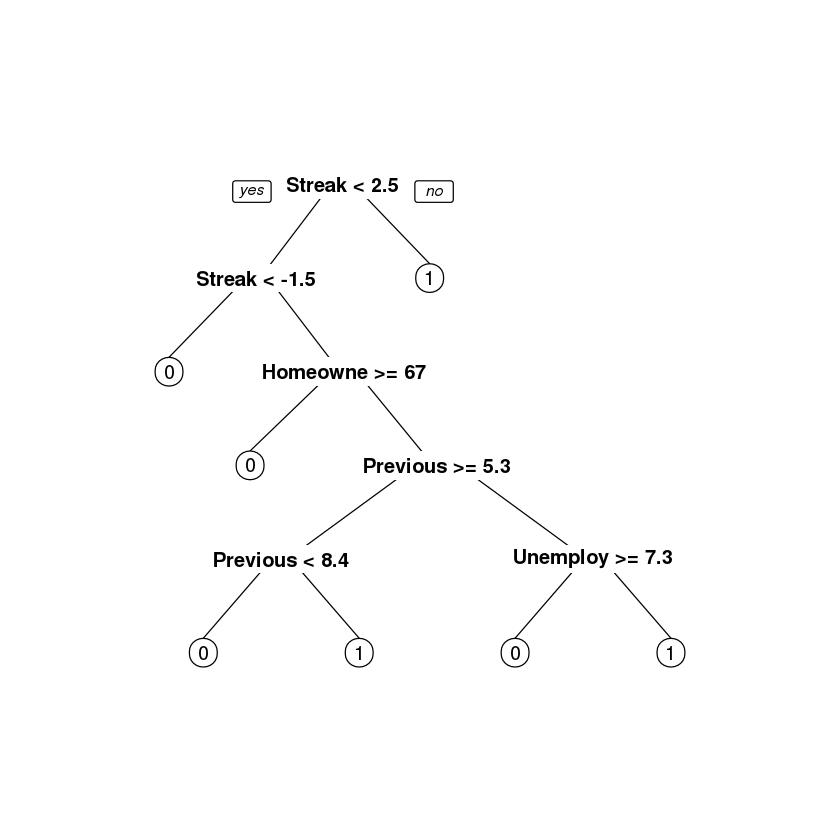

In [76]:
library(rpart.plot)
prp(Tree1)

In [77]:
predCart = predict(Tree1, newdata = testing, type = "class")

In [78]:
t = table(testing$RaisedFedFunds,predCart)
t

   predCart
     0  1
  0 64 23
  1 40 48

In [79]:
sum(diag(t))/sum(t)

[1] 0.64